# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Check in your data file along with this exercise. Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

### In this section, we load the dataset and display the number of rows and columns.
- This step allows us to understand the overall structure of the dataset.
- The `df.shape` function provides us with the number of rows (records) and columns (features) in the dataset.

In [40]:
import pandas as pd

# First we need to load the dataset into the google colab environment and we can also check the readability of the file if required
df = pd.read_csv("/content/Hospital_Data.csv")

#  Now,Display basic statistics
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

# Docstring and doctest for data diversity as we were instructed to include it in every week's assignment
print("*********************************")
print('***Alternative method for Basic statistics by using functions')
print("*********************************")
def basic_statistics(df):
    """
    Returns the number of rows and columns in the dataset.

    >>> df = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4]})
    >>> basic_statistics(df)
    ('Number of rows: 2', 'Number of columns: 2')
    """
    return f"Number of rows: {df.shape[0]}", f"Number of columns: {df.shape[1]}"

# Calling the function for testing
print(basic_statistics(df))

Number of rows: 318438
Number of columns: 18
*********************************
***Alternative method for Basic statistics by using functions
*********************************
('Number of rows: 318438', 'Number of columns: 18')


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

### Here, we identify how many unique values each column in the dataset has and find which column has the most distinct values.
- In this step, we check the number of distinct values for each column using the `nunique()` method.
- This helps us understand which columns contain the most variation, excluding columns that might have unique identifiers like `case_id` or `patientid`.


In [41]:
# Inorder to know the data diversity, first we need to have unique values per column
unique_counts = df.nunique()
print("Unique values per column:\n", unique_counts)

# Then, we should have column with the most unique values (excluding unique identifiers)
filtered_counts = unique_counts.drop(['case_id', 'patientid'], errors='ignore')
most_diverse_column = filtered_counts.idxmax()
print("Most diverse column:", most_diverse_column, "with", filtered_counts[most_diverse_column], "unique values")

# Docstring and doctest for data diversity as we were instructed to include it in every week's assignment
print("*********************************")
print('***Alternative method for Data diversity using functions')
print("*********************************")

def data_diversity(df):
    """
    Returns the number of unique values in each column and the column with the most diversity.

    >>> df = pd.DataFrame({'col1': [1, 1, 2], 'col2': [3, 3, 3]})
    >>> data_diversity(df)
    (col1    2
     col2    1
     dtype: int64, 'col1', 2)
    """
    unique_counts = df.nunique()
    filtered_counts = unique_counts.drop(['case_id', 'patientid'], errors='ignore')
    most_diverse_column = filtered_counts.idxmax()
    return unique_counts, most_diverse_column, filtered_counts[most_diverse_column]

# Call function for testing
print(data_diversity(df))


Unique values per column:
 case_id                              318438
Hospital_code                            32
Hospital_type_code                        7
City_Code_Hospital                       11
Hospital_region_code                      3
Available Extra Rooms in Hospital        18
Department                                5
Ward_Type                                 6
Ward_Facility_Code                        6
Bed Grade                                 4
patientid                             92017
City_Code_Patient                        37
Type of Admission                         3
Severity of Illness                       3
Visitors with Patient                    28
Age                                      10
Admission_Deposit                      7300
Stay                                     11
dtype: int64
Most diverse column: Admission_Deposit with 7300 unique values
*********************************
***Alternative method for Data diversity using functions
**************

### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

### In this step, we check if there are any columns where the value is the same across all rows (e.g., constant values).

- This step helps us identify columns that are redundant, meaning they have the same value for every row.
- These columns do not provide much useful information for analysis and could be removed or flagged for further consideration.

- P.S. No redundant data were found in the dataset that i have chosen to work with


In [42]:
# Columns with the same value across all rows
redundant_columns = [col for col in df.columns if df[col].nunique() == 1]
print("Columns with redundant values:", redundant_columns)

# Docstring and doctest for data diversity as we were instructed to include it in every week's assignment
print("*********************************")
print('***Alternative method for Data Redundancy using functions')
print("*********************************")
def data_redundancy(df):
    """
    Identifies columns where all values are the same.

    >>> df = pd.DataFrame({'col1': [1, 1, 1], 'col2': [2, 2, 3]})
    >>> data_redundancy(df)
    ['col1']
    """
    return [col for col in df.columns if df[col].nunique() == 1]

# Call function for testing
print(data_redundancy(df))


Columns with redundant values: []
*********************************
***Alternative method for Data Redundancy using functions
*********************************
[]


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

### Here, we create a histogram to visualize the distribution of values for a numeric column (e.g., `Admission_Deposit`).

- In this step, we focus on creating a histogram for a numeric column, such as `Admission_Deposit`, to visualize its distribution.
- A histogram is useful for understanding the frequency of different ranges of values within the column.


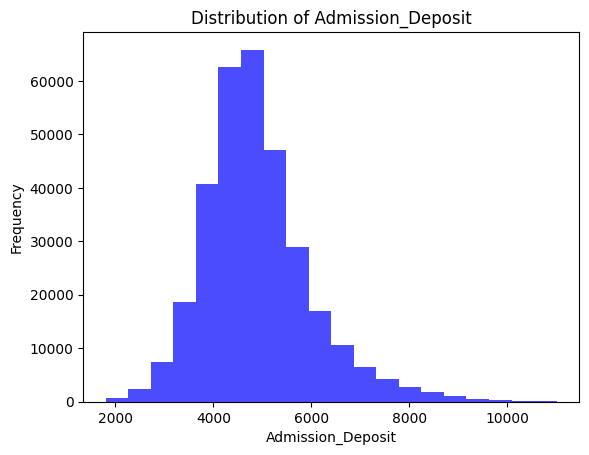

*********************************
***Alternative method for finding Range of values using functions
*********************************


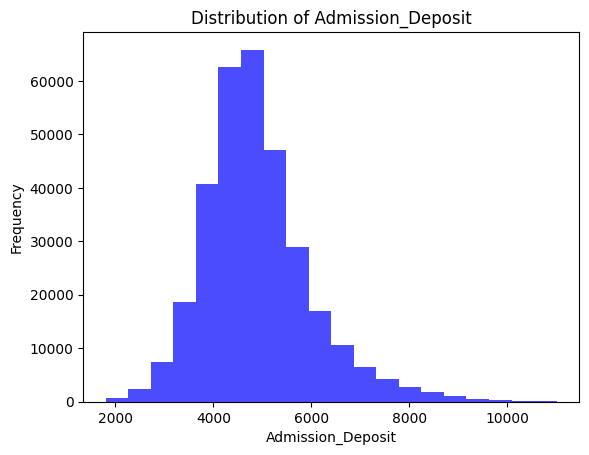

In [43]:
import matplotlib.pyplot as plt

# For obtaining data visualization(here - histogram), we first need to select a numeric column for histogram
numeric_column = 'Admission_Deposit'

# Then, we have to Plot the histogram as follows:
plt.hist(df[numeric_column].dropna(), bins=20, color='blue', alpha=0.7)
plt.title(f"Distribution of {numeric_column}")
plt.xlabel(numeric_column)
plt.ylabel("Frequency")
plt.show()

# Docstring and doctest for data diversity as we were instructed to include it in every week's assignment
print("*********************************")
print('***Alternative method for finding Range of values using functions')
print("*********************************")
def plot_histogram(df, column):
    """
    Plots a histogram of the specified column in the dataset.

    >>> df = pd.DataFrame({'Admission_Deposit': [100, 200, 300, 400]})
    >>> plot_histogram(df, 'Admission_Deposit')  # This will display the plot, not return a value
    """
    plt.hist(df[column].dropna(), bins=20, color='blue', alpha=0.7)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

# Call function for testing
plot_histogram(df, numeric_column)


### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

### In this part of the analysis, I explored how the average Admission_Deposit varies based on the severity of the illness. The analysis groups the data by Severity of Illness (e.g., High, Medium, Low) and calculates the average Admission_Deposit for each group.

### Key Observations:
- High severity cases tend to have significantly higher admission deposits, as expected due to the potentially more complex and resource-intensive care required.
- Low severity cases, on the other hand, have much lower average deposits.
- Medium severity cases fall in between, showing a moderate deposit amount.

### This could be useful in hospital management or policy-making, as it might inform how hospitals structure their deposits based on the severity of illness, potentially offering a more nuanced approach to billing or resource allocation.

Stay Distribution:
 Stay
21-30                 87491
Nov-20                78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: count, dtype: int64


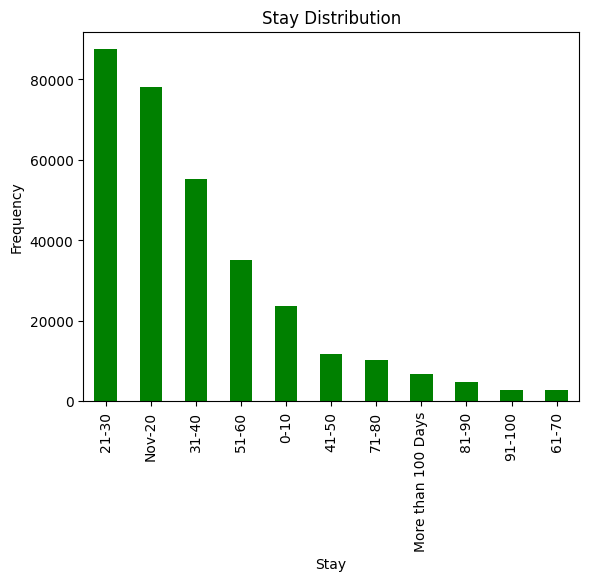

*********************************
***Alternative method for Average Admission Deposit by Severity of Illness using functions
*********************************
Stay
21-30                 87491
Nov-20                78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: count, dtype: int64


In [44]:
# First we need to find Stay distribution
stay_distribution = df['Stay'].value_counts()
print("Stay Distribution:\n", stay_distribution)

# Then, we have to the Plot Stay distribution againt average admission deposit as follows:
stay_distribution.plot(kind='bar', color='green')
plt.title("Stay Distribution")
plt.xlabel("Stay")
plt.ylabel("Frequency")
plt.show()

# Docstring and doctest for stay distribution
print("*********************************")
print('***Alternative method for Average Admission Deposit by Severity of Illness using functions')
print("*********************************")
def stay_distribution_analysis(df):
    """
    Analyzes the distribution of the 'Stay' column and returns the value counts.

    >>> df = pd.DataFrame({'Stay': ['Short', 'Long', 'Long', 'Short']})
    >>> stay_distribution_analysis(df)
    Short    2
    Long     2
    Name: Stay, dtype: int64
    """
    return df['Stay'].value_counts()

# Call function for testing
print(stay_distribution_analysis(df))




---



## Submitting Your Work

Submit your work as usual.